In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix, classification_report

In [6]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

In [8]:
# Iris dataset
iris = datasets.load_iris()

X = scale(iris.data)
y = pd.DataFrame(iris.target)
variable_names = iris.feature_names
X[:10]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

In [25]:
variable_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
clustering = KMeans(n_clusters = 3, random_state = 5)
clustering.fit(X)

KMeans(n_clusters=3, random_state=5)

In [27]:
iris_df = pd.DataFrame(data = iris.data)
iris_df.columns = [x[:-5] for x in variable_names]
iris_df.columns = [x.replace(' ', '_') for x in iris_df.columns]
y.columns = ['Targets']

In [28]:
iris_df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

Text(0.5, 1.0, 'KMeans Clustering')

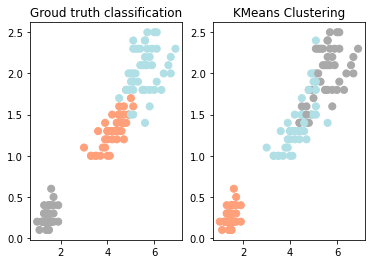

In [30]:
color_theme = np.array(['darkgray', 'lightsalmon', 'powderblue'])

plt.subplot(1,2,1)

plt.scatter(x = iris_df.petal_length, 
            y = iris_df.petal_width, 
            c = color_theme[iris.target],
            s = 50)

plt.title('Groud truth classification')

plt.subplot(1,2,2)

plt.scatter(x = iris_df.petal_length, 
            y = iris_df.petal_width, 
            c = color_theme[clustering.labels_],
            s = 50)

plt.title('KMeans Clustering')

In [31]:
relabel = np.choose(clustering.labels_, [2, 0, 1]).astype(np.int64)

Text(0.5, 1.0, 'KMeans Clustering')

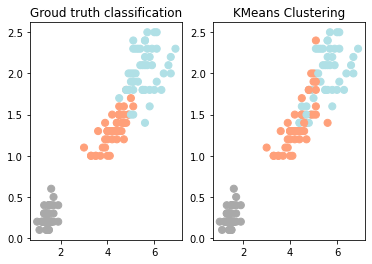

In [33]:
plt.subplot(1,2,1)

plt.scatter(x = iris_df.petal_length, 
            y = iris_df.petal_width, 
            c = color_theme[iris.target],
            s = 50)

plt.title('Groud truth classification')

plt.subplot(1,2,2)

plt.scatter(x = iris_df.petal_length, 
            y = iris_df.petal_width, 
            c = color_theme[relabel],
            s = 50)

plt.title('KMeans Clustering')

In [34]:
print(classification_report(y, relabel))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.74      0.78      0.76        50
           2       0.77      0.72      0.74        50

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150

